# LAB ASSIGNMENT -2

## **PALLA VENKATA SAI** ##

### 21MIA1051

#### Task -1

In [1]:
pip install ffmpeg-python


In [2]:
!apt update
!apt install -y ffmpeg
!pip install ffmpeg-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,421 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy R

In [3]:
import ffmpeg
import os

def get_video_info(video_path):
    try:
        probe = ffmpeg.probe(video_path)
        video_stream = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')


        frame_rate = eval(video_stream['r_frame_rate'])
        duration = float(video_stream['duration'])
        frame_count = int(video_stream['nb_frames'])
        width = int(video_stream['width'])
        height = int(video_stream['height'])


        display_video_info(frame_rate, duration, frame_count, width, height)

        return frame_rate, duration, frame_count, width, height
    except Exception as e:
        print(f"Error getting video info: {e}")
        return None

def display_video_info(frame_rate, duration, frame_count, width, height):
    print(f"Frame Rate: {frame_rate} fps")
    print(f"Duration: {duration:.2f} seconds")
    print(f"Frame Count: {frame_count} frames")
    print(f"Resolution: {width}x{height} pixels")

def extract_frames(video_path, output_folder):
    try:
        os.makedirs(output_folder, exist_ok=True)
        output_path = os.path.join(output_folder, 'frame_%04d.png')

        ffmpeg.input(video_path).output(output_path, start_number=0).run(capture_stdout=True, capture_stderr=True)
        print(f"Frames extracted to {output_folder}")
    except Exception as e:
        print(f"Error extracting frames: {e}")

def main(video_path, output_folder):

    video_info = get_video_info(video_path)

    if video_info is not None:

        extract_frames(video_path, output_folder)

if __name__ == "__main__":
    video_path = '/content/jr ntr.mp4'
    output_folder = '/content/frames'

    main(video_path, output_folder)


Frame Rate: 30.0 fps
Duration: 17.43 seconds
Frame Count: 523 frames
Resolution: 750x360 pixels
Frames extracted to /content/frames


## Task-2

I-Frames: 19 (3.63%)
P-Frames: 152 (29.06%)
B-Frames: 352 (67.30%)


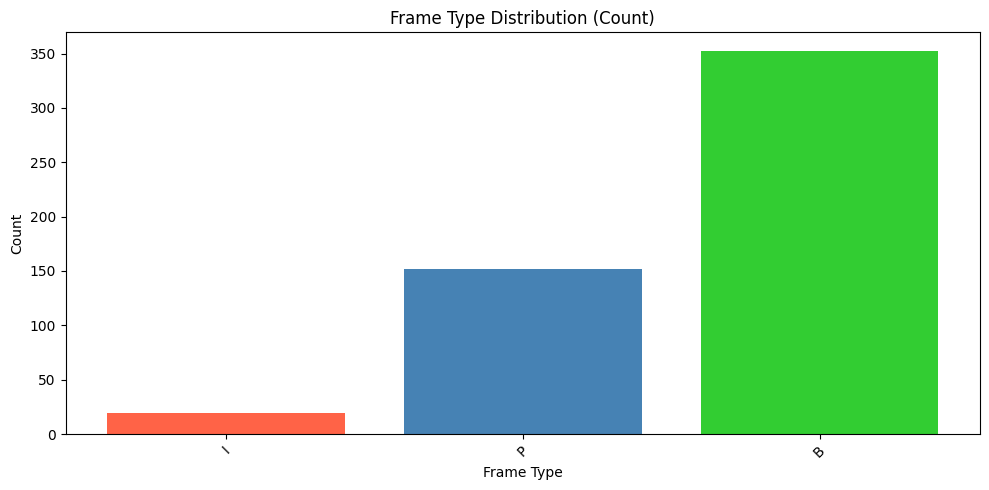

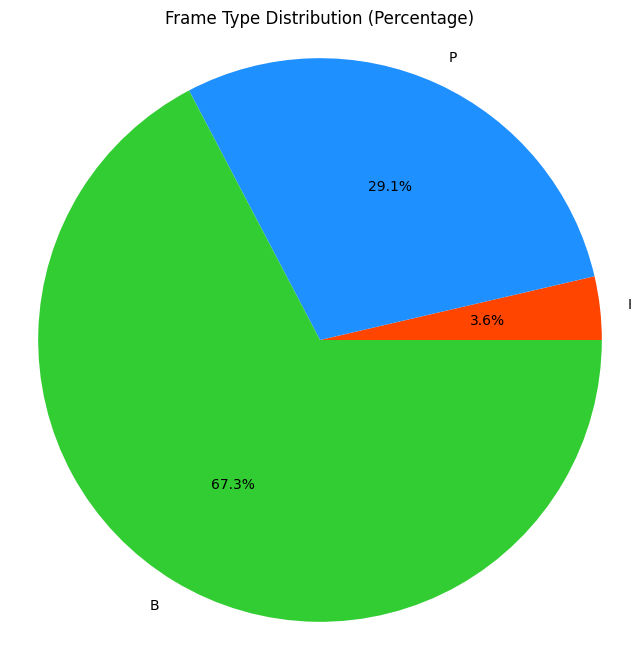

In [4]:
import ffmpeg
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    try:
        result = ffmpeg.probe(video_path, select_streams='v', show_frames=None, show_entries='frame=pict_type')
        frames = result['frames']


        frame_counts = {'I': 0, 'P': 0, 'B': 0}


        for frame in frames:
            frame_type = frame.get('pict_type')
            if frame_type in frame_counts:
                frame_counts[frame_type] += 1

        total_frames = sum(frame_counts.values())
        percentages = {frame_type: (count / total_frames * 100) if total_frames > 0 else 0 for frame_type, count in frame_counts.items()}

        display_frame_distribution(frame_counts, percentages)
        return frame_counts, percentages
    except Exception as e:
        print(f"Error analyzing frame types: {e}")
        return None, None

def display_frame_distribution(frame_counts, percentages):
    for frame_type in frame_counts:
        print(f"{frame_type}-Frames: {frame_counts[frame_type]} ({percentages[frame_type]:.2f}%)")

def visualize_frame_distribution(frame_counts):
    labels = list(frame_counts.keys())
    counts = list(frame_counts.values())


    bar_colors = ['tomato', 'steelblue', 'limegreen']
    pie_colors = ['orangered', 'dodgerblue', 'limegreen']


    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=bar_colors)
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Frame Type Distribution (Count)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=pie_colors)
    plt.title('Frame Type Distribution (Percentage)')
    plt.axis('equal')
    plt.show()

def main(video_path):
    frame_counts, percentages = analyze_frame_types(video_path)
    if frame_counts and percentages:
        visualize_frame_distribution(frame_counts)

if __name__ == "__main__":
    video_path = '/content/jr ntr.mp4'
    main(video_path)


## Task - 3

In [5]:
import ffmpeg
import os
from PIL import Image

def extract_frames(video_path, output_folder, frame_type):

    try:
        os.makedirs(output_folder, exist_ok=True)
        output_pattern = os.path.join(output_folder, 'frame_%04d.png')
        (
            ffmpeg
            .input(video_path)
            .output(output_pattern, vf=f'select=eq(pict_type\\,{frame_type})', vsync='vfr')
            .run()
        )
        print(f"{frame_type} frames extracted and saved to {output_folder}.")
    except Exception as e:
        print(f"Error extracting {frame_type} frames: {e}")

def display_extracted_frames(folder_path):

    try:
        image_files = [img for img in os.listdir(folder_path) if img.endswith('.png')]
        if not image_files:
            print(f"No frames found in {folder_path}.")
            return

        for image_file in image_files:
            img_path = os.path.join(folder_path, image_file)
            img = Image.open(img_path)
            img.show()
    except Exception as e:
        print(f"Error displaying frames from {folder_path}: {e}")

def process_video_frames(video_path, output_folders):

    for frame_type, folder in output_folders.items():
        extract_frames(video_path, folder, frame_type)
        display_extracted_frames(folder)

def main(video_path):
    output_folders = {
        'I': '/content/I_frames',
        'P': '/content/P_frames',
        'B': '/content/B_frames'
    }
    process_video_frames(video_path, output_folders)

if __name__ == "__main__":
    video_path = '/content/jr ntr.mp4'
    main(video_path)


I frames extracted and saved to /content/I_frames.
P frames extracted and saved to /content/P_frames.
B frames extracted and saved to /content/B_frames.


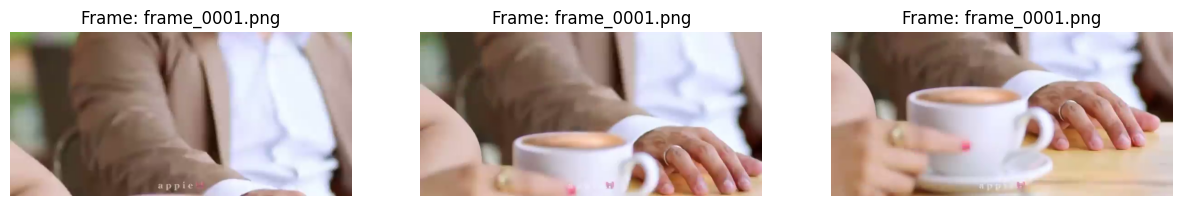

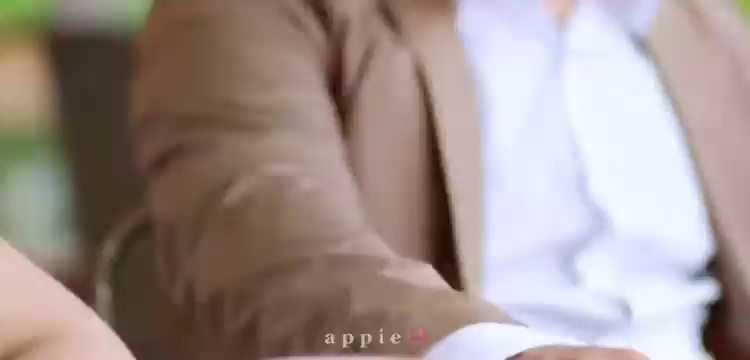

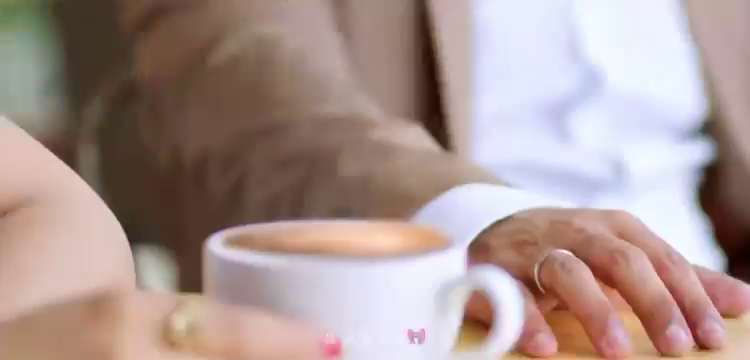

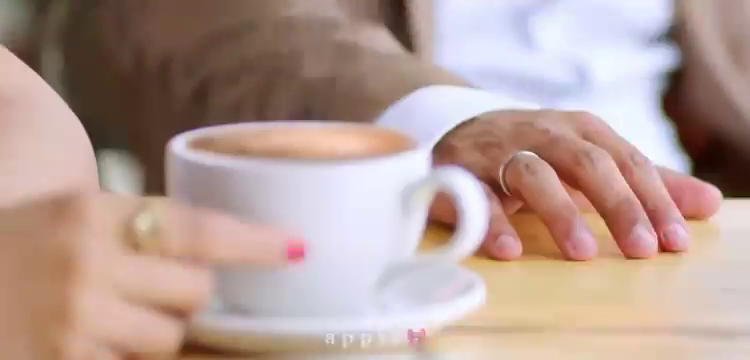

In [6]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def display_frames_with_pil(frame_paths):

    if not frame_paths:
        print("No frames to display.")
        return

    plt.figure(figsize=(15, 5))
    for i, frame_path in enumerate(frame_paths):
        try:
            img = Image.open(frame_path)
            plt.subplot(1, len(frame_paths), i + 1)
            plt.imshow(img)
            plt.title(f"Frame: {os.path.basename(frame_path)}")
            plt.axis('off')
        except Exception as e:
            print(f"Error opening {frame_path} with PIL: {e}")
    plt.show()

def display_frames_with_opencv(frame_paths):

    if not frame_paths:
        print("No frames to display.")
        return

    for frame_path in frame_paths:
        try:
            img = cv2.imread(frame_path)
            if img is not None:
                cv2_imshow(img)
            else:
                print(f"Error: Could not read {frame_path}.")
        except Exception as e:
            print(f"Error displaying {frame_path} with OpenCV: {e}")

def get_frame_paths(frame_types, base_path):

    frame_paths = []
    for frame_type in frame_types:
        frame_path = os.path.join(base_path, frame_type, "frame_0001.png")
        frame_paths.append(frame_path)
    return frame_paths

def main():
    base_path = '/content'
    frame_types = ['I_frames', 'P_frames', 'B_frames']


    frame_paths = get_frame_paths(frame_types, base_path)


    display_frames_with_pil(frame_paths)
    display_frames_with_opencv(frame_paths)

if __name__ == "__main__":
    main()


### Calculation of SSIM

In [7]:
import os
from skimage import io
from skimage.metrics import structural_similarity as ssim

def get_file_size(file_path):

    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

def calculate_ssim(image_path1, image_path2, data_range):

    image1 = io.imread(image_path1, as_gray=True)
    image2 = io.imread(image_path2, as_gray=True)
    ssim_index, _ = ssim(image1, image2, data_range=data_range, full=True)
    return ssim_index

# Paths
i_frame_path = "/content/I_frames/frame_0001.png"
p_frame_path = "/content/P_frames/frame_0001.png"
b_frame_path = "/content/B_frames/frame_0001.png"

# Getting sizes
i_frame_size = get_file_size(i_frame_path)
p_frame_size = get_file_size(p_frame_path)
b_frame_size = get_file_size(b_frame_path)

print(f"I-frame size: {i_frame_size / 1024:.2f} KB")
print(f"P-frame size: {p_frame_size / 1024:.2f} KB")
print(f"B-frame size: {b_frame_size / 1024:.2f} KB")

# Assuming 8-bit images
data_range = 255

# Calculating SSIM
ssim_p_vs_i = calculate_ssim(i_frame_path, p_frame_path, data_range)
ssim_b_vs_i = calculate_ssim(i_frame_path, b_frame_path, data_range)
ssim_b_vs_p = calculate_ssim(p_frame_path, b_frame_path, data_range)

print(f"SSIM between I-frame and P-frame: {ssim_p_vs_i:.4f}")
print(f"SSIM between I-frame and B-frame: {ssim_b_vs_i:.4f}")
print(f"SSIM between P-frame and B-frame: {ssim_b_vs_p:.4f}")

I-frame size: 205.29 KB
P-frame size: 263.54 KB
B-frame size: 286.72 KB
SSIM between I-frame and P-frame: 0.9908
SSIM between I-frame and B-frame: 0.9883
SSIM between P-frame and B-frame: 0.9906


### Task 4

In [8]:
import os

def calculate_file_size(file_path):

    try:
        return os.path.getsize(file_path)
    except Exception as e:
        print(f"Error getting size for {file_path}: {e}")
        return 0

def calculate_average_frame_size(folder_path):

    frame_sizes = []
    try:
        for frame_file in os.listdir(folder_path):
            if frame_file.endswith('.png'):
                frame_path = os.path.join(folder_path, frame_file)
                frame_size = calculate_file_size(frame_path)
                if frame_size > 0:
                    frame_sizes.append(frame_size)

        average_size = sum(frame_sizes) / len(frame_sizes) if frame_sizes else 0
        return average_size, frame_sizes
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")
        return 0, []

def display_average_sizes(i_avg_size, p_avg_size, b_avg_size):

    print(f"Average I-Frame Size: {i_avg_size / 1024:.2f} KB")
    print(f"Average P-Frame Size: {p_avg_size / 1024:.2f} KB")
    print(f"Average B-Frame Size: {b_avg_size / 1024:.2f} KB")

def main():
    i_frames_folder = '/content/I_frames'
    p_frames_folder = '/content/P_frames'
    b_frames_folder = '/content/B_frames'

    # Calculate average frame sizes
    i_avg_size, _ = calculate_average_frame_size(i_frames_folder)
    p_avg_size, _ = calculate_average_frame_size(p_frames_folder)
    b_avg_size, _ = calculate_average_frame_size(b_frames_folder)

    # Display average sizes
    display_average_sizes(i_avg_size, p_avg_size, b_avg_size)

if __name__ == "__main__":
    main()


Average I-Frame Size: 343.42 KB
Average P-Frame Size: 372.05 KB
Average B-Frame Size: 377.93 KB


Task - 5

In [9]:
import os
import subprocess

def check_ffmpeg_installed():

    try:
        subprocess.run(['ffmpeg', '-version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
    except subprocess.CalledProcessError:
        raise RuntimeError("FFmpeg is not installed or not found in the system path.")

def validate_directory(directory):

    if not os.path.isdir(directory):
        raise FileNotFoundError(f"The directory {directory} does not exist.")
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    if not files:
        raise FileNotFoundError(f"No files found in the directory {directory}.")
    return files

def create_frame_list_file(frame_paths, list_file_path='frames_list.txt'):

    with open(list_file_path, 'w') as file:
        for frame in frame_paths:
            file.write(f"file '{frame}'\n")

def reconstruct_video_from_i_frames(i_frames_folder, output_video_path, frame_rate=30):

    check_ffmpeg_installed()

    i_frames = validate_directory(i_frames_folder)
    i_frames.sort()

    frame_paths = [os.path.join(i_frames_folder, frame) for frame in i_frames]
    create_frame_list_file(frame_paths)

    command = [
        'ffmpeg',
        '-f', 'concat',
        '-safe', '0',
        '-i', 'frames_list.txt',
        '-framerate', str(frame_rate),
        '-c:v', 'libx264',
        '-pix_fmt', 'yuv420p',
        output_video_path
    ]

    subprocess.run(command, check=True)
    os.remove('frames_list.txt')

def main():
    i_frames_folder = '/content/I_frames'
    output_video_path = 'output_reconstructed_video.mp4'
    reconstruct_video_from_i_frames(i_frames_folder, output_video_path, frame_rate=15)

if __name__ == "__main__":
    main()
